# 📝 Exercise M4.04

In the previous notebook, we saw the effect of applying some regularization
to the coefficient of a linear model.

In this exercise, we will study the advantage of using some **regularization**
when dealing with **correlated features**.

We will first create an **artificial regression dataset**. This dataset will contain **2,000
samples** and **5 features** from which only **2 features will be informative**.

In [20]:
from sklearn.datasets import make_regression

data, target, coef = make_regression(
    n_samples=2_000, n_features=5, n_informative=2, shuffle=False,
    coef=True, random_state=0, noise=30,
)

When creating the dataset, `make_regression` returns the true coefficient
used to generate the dataset. Let's plot this information.

Features 0     9.566665
Features 1    40.192077
Features 2     0.000000
Features 3     0.000000
Features 4     0.000000
dtype: float64

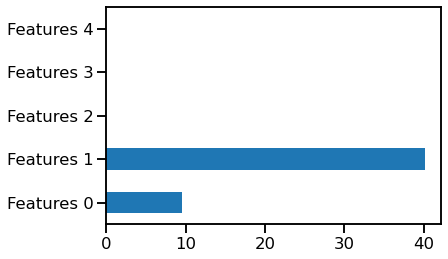

In [21]:
import pandas as pd

feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(coef, index=feature_names)
coef.plot.barh()
coef

Create a `LinearRegression` regressor and fit on the entire dataset and
check the value of the coefficients. Are the coefficients of the linear
regressor close to the coefficients used to generate the dataset?

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)
linear_regression.coef_

array([10.89587004, 40.41128042, -0.20542454, -0.18954462,  0.11129768])

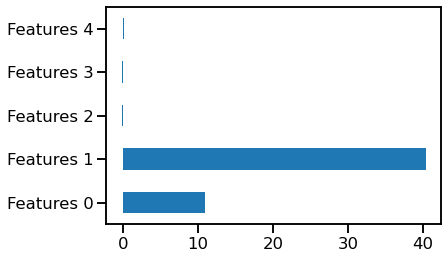

In [23]:
feature_names = [f"Features {i}" for i in range(data.shape[1])]
coef = pd.Series(linear_regression.coef_, index=feature_names)
_ = coef.plot.barh()

We see that the coefficients are close to the coefficients used to generate
the dataset. Any deviation is caused by the noise introduced in the
dataset generation.

Now, create a new dataset similar to `data` with 4 additional
columns repeating twice features 0 and 1. This procedure will create
perfectly correlated features.

In [24]:
import numpy as np
data = np.append(data, data[:, 0].reshape(-1, 1), axis=1)
data = np.append(data, data[:, 0].reshape(-1, 1), axis=1)
data = np.append(data, data[:, 1].reshape(-1, 1), axis=1)
data = np.append(data, data[:, 1].reshape(-1, 1), axis=1)
data.shape

(2000, 9)

Fit again the **linear regressor** on this new dataset and check the
coefficients. What do you observe?

In [26]:
model2 = LinearRegression()
model2.fit(data, target)
model2.coef_

array([ 1.33594010e+12, -1.62497905e+14, -1.89453125e-01, -1.59301758e-01,
        8.59375000e-02, -6.67970049e+11, -6.67970049e+11,  4.20600332e+13,
        1.20437872e+14])

Create a **ridge regressor** and fit on the same dataset. Check the coefficients.
What do you observe?

In [28]:
from sklearn.linear_model import Ridge
model3 = Ridge()
model3.fit(data, target)
model3.coef_

array([ 3.6313933 , 13.46802113, -0.20549345, -0.18929961,  0.11117205,
        3.6313933 ,  3.6313933 , 13.46802113, 13.46802113])

Can you find the **relationship** between the **ridge coefficients** and the **original
coefficients**?

In [31]:
model3.coef_[:5] / linear_regression.coef_

array([0.33328163, 0.3332738 , 1.00033542, 0.99870739, 0.99887123])

**Ridge regression** **distributes** the original **weights** across the correlated features **evenly**!